# Redes Neuronales Recurrentes

### Julián D. Arias Londoño

Profesor Asociado  
Departamento de Ingeniería de Sistemas  
Universidad de Antioquia, Medellín, Colombia  
julian.ariasl@udea.edu.co

In [11]:
%matplotlib inline

Las redes neuronales recurrentes (En inglés Recurrent Neural Networks - RNN) son una familia de redes neuronales para procesar datos secuenciales, las cuales se basan en el principio de compartir parámetros a lo largo de diferentes partes del modelo, lo que permite aplicar el modelo a datos con estructuras diferentes (por ejemplo diferentes longitudes) y generalizar sobre ellos. Si por el contrario se tuviera un párametro para cada índice de tiempo, no se podría generalizar a longitudes de secuencias no vistas durante el entrenamiento, o compartir patrones detectados por el modelo a lo largo de diferentes longitudes de secuencias y posiciones en el tiempo; dicha propiedad es particularmente importante cuando una pieza de información específica puede ocurrir en múltiples posiciones dentro de una secuencia [1].

La red permanece Feed-forward pero mantiene el estado interno a través de nodos de contexto los cuales influencian la capa oculta en entradas subsecuentes. Existen diferentes arquitecturas de RNN, las más conocidas son (Figura tomada de <a href="https://www.ibm.com/developerworks/library/cc-cognitive-recurrent-neural-networks/index.html">Link</a>.):

![alt text](Images/RNN2.png "Neuronas")

Las RNN pueden resolver diferentes paradigmas de aprendizaje, es decir, tienen la capacidad de ajustarse a diferentes configuraciones en los datos. El diagrama construido por <a href="http://karpathy.github.io/2015/05/21/rnn-effectiveness/">Andrej Karpathy</a> representa muy bien dicha capacidad:

![alt text](Images/RNN-Topol.jpeg "Neuronas")

El primer caso corresponde a una MLP convencional en la cual se tiene una salida por cada entrada y no existe información compartida a través de las capas ocultas. El segundo caso corresponde a un problema en el que a una entrada, el modelo debe producir una salida compuesta de varios elementos, como por ejemplo un sistema al cual se le presente una imágen y proporcione como salida una descripción o listado de los objetos en la imágen (problema conocido como caption generation). La tercera opción corresponde a un problema en el que al sistema se le presenta una secuencia y el modelo debe proporcionar una única salida para toda la secuencia, por ejemplo en el problema de <em>Sentiment Analysis</em>, usualmente el objetivo es que el sistema catalogue un texto como positivo o negativo. El cuarto caso corresponde a problemas en los que la entrada es una secuencia y la salida otra, sin que necesariamente ambas secuencias deban tener la misma longitud (esta configuración también se conoce como sequence-to-sequence). Un ejemplo de este tipo de paradigmas se presenta en la traducción automática de textos en la que la oración en el lenguaje original puede tener un número mayor o menor de palabras que en el lenguaje objetivo. El quinto caso corresponde a un problema en el que para cada entrada el sistema debe proporcionar una salida (la longitud de las secuencias entrada y salida es la misma), a este tipo de paradigmas corresponde la predicción de series de tiempo, el etiquetado morfosintáctico, varias tareas en Bioinformática, entre otros.

La arquitectura Elman de las RNN es la más comunmente usada. De acuerdo con la notación definida en la primera figura, la descripción matemática de una red de este tipo con una sola capa oculta y una capa de salida estaría dada por:

$${\bf{a}}^{(t)} = {\bf{b}} + {\bf{V}}{\bf{h}}^{(t-1)} + {\bf{U}}{\bf{x}}^{(t)},\\ {\bf{h}}^{(t)} = \tanh({\bf{a}}^{(t)}), \\ {\bf{o}}^{(t)} = {\bf{c}} + {\bf{W}}{\bf{h}}^{(t)}$$

donde $\bf{V}$ corresponde a la matriz de pesos que conectan la salida de una neurona en el tiempo anterior para usarla como entrada en el tiempo actual. $\bf{U}$ es la matriz de pesos para las entradas de la red y $\bf{W}$ es la matriz de pesos que conecta el estado de la neurona interna con la neurona de la capa de salida. $\bf{b}$ y $\bf{c}$ son vectores con los términos independientes de la capa oculta y la capa de salida respectivamente. La salida ${\bf{y}}^{(t)}$ de la red estará determinada por la función de activación aplicada sobre los valores ${\bf{o}}^{(t)}$.

### Backpropagation through time (BPTT)

Para incorporar las habilidades descritas, una RNN incluye la capacidad de mantener memoria interna y usar la información almacenada a través de lazos de realimentación y de esa manera darle soporte al modelamiento temporal, es decir, a la condición de dependencia estadística de observaciones consecutivas. Como se puede observar en la siguiente figura, la salida de las neuronas en la capa oculta, es usada nuevamente como entrada a la misma capa. Figura tomada de <a href="https://future-tech-association.org/2018/01/16/kotoba_kioku_tech/">Link</a>.


![alt text](Images/RNN3.png "Neuronas")

El entrenamiento de una RNN puede realizarse usando el algoritmo Backpropagation descrito en clases anteriores, teniendo en cuenta  el modelo desdoblado mostrado en la primera figura. Es decir, es necesario propagar la red hacia adelante, almacenar todas las salidas parciales de las diferentes neuronas en cada una de las capas y tiempos $t$, y a partir de la función de costo definida, propagar el error hacia atrás. La pérdida total para una secuencia de valores $\bf{x}$ y su correspondiente secuencia de salida $\bf{y}$ (tenga en cuenta que la red puede tener múltiples salidas, entonces cada salida corresponde a un vector), corresponderá entonces a la suma de las pérdidas para cada uno de los tiempos en la secuencia. La función de costo de la red será entonces:

$$L(\{ {\bf{x}}^{(1)},{\bf{x}}^{(2)},\cdots,{\bf{x}}^{(\tau)} \}, \{ {\bf{y}}^{(1)},{\bf{y}}^{(2)},\cdots,{\bf{y}}^{(\tau)} \}) \\
L = \sum_t L^{(t)}$$

Dependiendo del tipo de problema a resolver, la función de pérdida puede ser el error cuadrático medio, o en problemas de clasificación el negativo de la verosimilitud $L^{(t)} = -\log Pmodel (\hat{y}^{(t)} |\{{\bf{x}}^{(1)},\cdots,{\bf{x}}^{(t)}  \})$, donde $Pmodel(\cdot)$ corresponde a la probabilidad asignada por el modelo a la salida de la red que para el tiempo $(t)$ debería estar en uno. Se asume en este caso que la función de actividación de la capa salida corresponde a una función softmax, la cual garantiza que la salida de la red pueda ser interpretada como una probablidad. Uno de los problemas del algoritmo BPTT es que las operaciones de forward y backward del algoritmo no son paralelizables por su interdepedencia, lo que hace al algoritmo completamente secuencial.

En primer lugar debemos estimar el gradiente de la función de costo con respecto a las salidas de la red en un tiempo cualquiera $(t)$:

$$(\nabla_{{\bf{o}}^{(t)}}L)_i = \frac{\partial L}{\partial o_i^{(t)}} = \frac{\partial L}{\partial L^{(t)}} \frac{\partial L^{(t)}}{\partial o_i^{(t)}} = \hat{y}_i^{(t)} - 1 \\ \nabla_{{\bf{o}}^{(t)}}L = {\bf{y}}^{(t)} \odot ({\bf{\hat{y}}}^{(t)} - {\bf{1}} )$$

En la expresión anterior $\odot$ representa el producto Hadamard, es decir el producto punto a punto entre los vectores. Note que el único objetivo es mostrar que el gradiente es un vector que sólo puede tomar valor diferente de cero en la posición que corresponde a la salida deseada en el tiempo $(t)$, los demás valores son cero. A partir de la expresión anterior, podemos comenzar entonces el ciclo de propagación hacia atrás a partir del final de la secuencia. En el tiempo final $\tau$, ${\bf{h}}^{(\tau)}$ sólo tiene a ${\bf{o}}^{(\tau)}$ como descendiente, por lo tanto su gradiente es simple:

$$ \nabla_{{\bf{h}}^{(\tau)}} L = {\bf{W}}^T\nabla_{{\bf{o}}^{(\tau)}}L$$

A partir de este punto se puede comenzar a iterar hacia atrás para propagar los gradientes a través del tiempo, desde $t=\tau-1$ hasta $t = 1$. Hay que tener en cuenta que ahora ${\bf{h}}^{(t)}$ (para $t < \tau$) tiene dos descendientes ${\bf{o}}^{(t)}$ y ${\bf{h}}^{(t+1)}$. Su gradiente está dado por:

$$ \nabla_{{\bf{h}}^{(t)}}L = \left( \frac{\partial {\bf{h}}^{(t+1)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{h}}^{(t+1)}} L) + \left(\frac{\partial {\bf{o}}^{(t)}}{\partial {\bf{h}}^{(t)}}\right)^T(\nabla_{{\bf{o}}^{(t)}}L) \\
\nabla_{{\bf{h}}^{(t)}}L = {\bf{V}}^T(\nabla_{{\bf{h}}^{(t+1)}} L)\text{diag} \left( 1 - \left( {\bf{h}}^{(t+1)} \right)^2\right) + {\bf{W}}^T(\nabla_{{\bf{o}}^{(t)}}L)$$

Una vez se obtienen los gradientes de los nodos internos, se pueden obtener los gradientes de los parámetros, teniendo en cuenta que estos se comparten a lo largo del tiempo:

$$ \nabla_{\bf{c}} L = \sum_t \left(\frac{\partial {\bf{o}}^{t}}{\partial {\bf{c}}}\right)^T \nabla_{{\bf{o}}^{(t)}}L$$

$$ \nabla_{\bf{b}} L = \sum_t \left(\frac{\partial {\bf{h}}^{t}}{\partial {\bf{b}}}\right)^T \nabla_{{\bf{h}}^{(t)}}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)\nabla_{{\bf{h}}^{(t)}} L $$

$$\nabla_{{\bf W}}L = \sum_t \sum_i \left(  \frac{\partial L}{\partial o_i^{(t)}} \right)^T \nabla_{{\bf W}} o_i^{(t)} = \sum_t (\nabla_{{\bf{o}}^{(t)}}L){\bf{h}}^{(t)^T}$$

$$\nabla_{\bf V}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{h}}^{(t-1)^T}$$

$$ \nabla_{\bf U}L = \sum_t \text{diag}\left( 1 - \left( {\bf{h}}^{(t)} \right)^2\right)(\nabla_{{\bf{h}}^{(t)}} L){\bf{x}}^{(t)^T} $$

Una vez calculados los gradientes se puede proceder a actualizar los parámetros usando la regla del gradiente descendente o similar. Veamos un ejemplo de aplicación:

Epoch: 100; Error: 0.25121219195;
Epoch: 200; Error: 0.0754892838743;
Epoch: 300; Error: 0.120768353064;
Epoch: 400; Error: 0.0752163347489;
Epoch: 500; Error: 0.0640042835346;
The maximum number of train epochs is reached


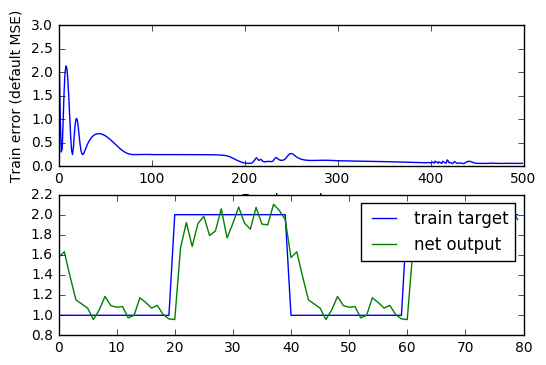

In [11]:
# -*- coding: utf-8 -*-
""" 
Example of use Elman recurrent network
=====================================

Task: Detect the amplitudes

"""

import neurolab as nl
import numpy as np

# Create train samples
i1 = np.sin(np.arange(0, 20))
i2 = np.sin(np.arange(0, 20)) * 2

t1 = np.ones([1, 20])
t2 = np.ones([1, 20]) * 2

input = np.array([i1, i2, i1, i2]).reshape(20 * 4, 1)
target = np.array([t1, t2, t1, t2]).reshape(20 * 4, 1)

# Create network with 2 layers
net = nl.net.newelm([[-2, 2]], [10, 1], [nl.trans.TanSig(), nl.trans.PureLin()])
# Set initialized functions and init
net.layers[0].initf = nl.init.InitRand([-0.1, 0.1], 'wb')
net.layers[1].initf= nl.init.InitRand([-0.1, 0.1], 'wb')
net.init()
# Train network
error = net.train(input, target, epochs=500, show=100, goal=0.01)
# Simulate network
output = net.sim(input)

# Plot result
import pylab as pl
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('Train error (default MSE)')

pl.subplot(212)
pl.plot(target.reshape(80))
pl.plot(output.reshape(80))
pl.legend(['train target', 'net output'])
pl.show()

Cuando las series a partir de las cuales se entrena la RNN son muy extensas en longitud, el entrenamiento de la red se puede hacer muy lento y además aumentar considerablemente los requerimientos en memoria, porque es necesario propagar toda la red en el tiempo, almacenar los resultados parciales de cada tiempo para posteriormente realizar la etapa Backward del algoritmo y comenzar con la siguiente época. Por esa razón, en el caso de RNN también se suele usar un procedimiento similar al entrenamiento mini-batch, en el que se propaga la red hacia adelante hasta un tiempo intermedio $(t)$, se realiza la etapa Backward, y por lo tanto la actualización de los parámetros de la red, y se continua la propagación hacia adelante a partir del tiempo $(t + 1)$. De esta manera se acelera la convergencia de la red y se disminuyen los requerimientos en memoria. A esta versión del algoritmo de entrenamiento se le conoce como <b>Truncated BPTT</b>.

### Redes Neuronales Recurrentes Bidireccionales

En algunos problemas la información necesaria para hacer la predicción en un punto de la secuencia, implica conocer información del pasado, pero también del futuro. Por ejemplo en problemas de reconocimiento de voz o traducción, es usual que se requiera conocer la información de la secuencia completa. Las Bidirectional RNN (BRNN) corresponden a una modificación de las RNN en las que se incluye una capa adicional que en lugar de transmitir la información del tiempo $(t)$ al tiempo $(t + 1)$, lo hace al contrario. Las dos capas ocultas en este caso no tiene interconexión entre ellas, pero si con la capa de salida.

![alt text](Images/RNN_arc_3.png "Neuronas")

Este tipo de arquitecturas se emplean tanto en casos en los que para cada entrada se requiere producir una salida, como en casos en los que se desea producir una única salida para toda la secuencia.

### Long Short Term Memory RNN (LSTM)

El principal problema de las RNN convencionales es su incapacidad para aprender dependencias de orden superior en los datos, es decir, que el modelo capture información que le permita determinar la influencia que tiene un dato visto por el modelo hace varios tiempos atrás con respecto a la salida del modelo en el tiempo actual. Incluso, que pueda capturar depdencias cortas y dependencias largas al mismo tiempo. Esto sucede debido a que si se analizan con detenimiento las funciones de actualización de los parámetros, la matriz $\bf{V}$ que contiene los pesos de los lazos de realimentación se multiplica así misma $(\tau-1)$ veces, lo que implica que si sus valores son inferiores a cero, terminan desvaneciendose y si son muy grandes, terminarán divergiendo. A este hecho se suma que la aplicación consecutiva de múltiples funciones de activación, terminan por desvaner el resultado.

![alt text](Images/sigmoid_vanishing_gradient.png "Neuronas")

Este problema ha sido estudiado ampliamente y se han propuesto múltiples alternativas desde finales de los años 80 y comienzos de los 90. De todas las arquitecturas propuestas, la de mayor éxito es una en la que se reemplazan los perceptrones por otro tipo de unidades básicas, llamadas celulas. Las redes neuronales recurrentes compuestas por dichas célculas se conocen con el nombre de Long-Short-Term-Memory Neural Networks (LSTM). Las LSTM fueron propuestas en 1997 y tienen la capacidad de aprender dependencias de tiempo corto, largo y así mismo de decir cuándo olvidar.  

![alt text](Images/LSTM2.jpeg "LSTM")

### Exponential Weighted Average

Las LSTM usan como principio el promedio acumulado conocido como Exponential Weighted Moving Average (EWMA) y que originalmente fue propuesto para unas unidades conocidas como "Leaky Units". El EWMA tiene en cuenta más o menos información del pasado, de acuerdo con un parámetero. La regla de acumulación está dada por: $\mu^{(t)} \leftarrow \beta \mu^{(t-1)} + (1 - \beta)\upsilon^{(t)}$.

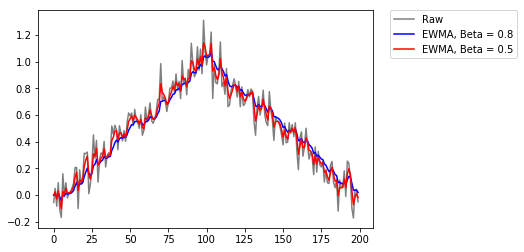

In [12]:
import numpy as np
import matplotlib.pyplot as plt 
# make a hat function, and add noise
x = np.linspace(0,1,100)
x = np.hstack((x,x[::-1]))
x += np.random.normal( loc=0, scale=0.1, size=200 )
plt.plot( x, 'k', alpha=0.5, label='Raw' )
 
Beta1 = 0.8
Beta2 = 0.5
x1 = np.zeros(200)
x2 = np.copy(x1)
for i in range(1,200):
    x1[i] = Beta1*x1[i-1] + (1-Beta1)*x[i]
    x2[i] = Beta2*x2[i-1] + (1-Beta2)*x[i]
# regular EWMA, with bias against trend
plt.plot( x1, 'b', label='EWMA, Beta = 0.8' )
 
# "corrected" (?) EWMA
plt.plot( x2, 'r', label='EWMA, Beta = 0.5' )
 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
#savefig( 'ewma_correction.png', fmt='png', dpi=100 )

Como se puede observar en la gráfica anterior, el parámetro $\beta$ controla si la salida del promedio toma más en cuenta el dato actual (línea roja), o el histórico (línea azul). 

Las LSTM usan el mismo principio para controlar el nivel de memoria o de dependencia en el tiempo, pero en lugar de usar un parámetro constante, definen <b>compuertas</b> que son entrenadas como parte del algoritmo de entrenamiento y que deciden cuándo mantener y cuándo olvidar la información precedente. Una celula LSTM contiene tres compuertas, que se representan en la gráfica por la letra $\sigma$, las cuales representan funciones sigmoide que garantizan que dichos valores están en el intervalo $(0,1)$. Adicionalmente, una célula LSTM define una variable adicional llamada <b>estado</b>. Las tres compuertas le permiten a la célula olvidar su estado o no, escribir o no, y leer o no.

![alt text](Images/LSTM2.png "LSTM")

Usando la notación de la gráfica anterior, para el tiempo $t$ y la célula $l$, la célula estará descrita por las siguientes funciones:

$$f_l^{(t)} = \sigma \left( b_l^f + \sum_j U_{l,j}^f x_j^{(t)} + \sum_j V_{l,j}^f h_j^{(t-1)}\right)$$

$$ c_l^{(t)} = f_l^{(t)}c_l^{(t-1)} + i_l^{(t)}\tanh \left( b_l^c + \sum_j U_{l,j}^c x_j^{(t)} + \sum_j V_{l,j}^c h_j^{(t-1)} \right)$$

$$i_l^{(t)} = \sigma \left( b_l^i + \sum_j U_{l,j}^i x_j^{(t)} + \sum_j V_{l,j}^i h_j^{(t-1)}\right)$$

$$h_l^{(t)} = \tanh(c_l^{(t)})o_l^{(t)}$$

$$o_l^{(t)} = \sigma \left( b_l^o + \sum_j U_{l,j}^o x_j^{(t)} + \sum_j V_{l,j}^o h_j^{(t-1)}\right)$$

donde $c_l^{(t)}$ es el estado de la célula en el tiempo $t$, por lo tanto la compuerta $f_l^{(t)}$ controla cuánto debe recordar la célula de su estado anterior $c_l^{(t-1)}$. Por otro lado, $i_l^{(t)}$ es una compuerta que controla cuánta influencia tendrá la información actual (entrada $x^{(t)}$ y salida anterior $h^{(t-1)}$) en el estado actual de la célula. La compuerta $o_l^{(t)}$ por su parte controla el nivel de activación de la salida.

El conjunto completo de parámetros que deben ser ajustados es entonces ${\bf{V}}^f, {\bf{U}}^f, {\bf{b}}^f, {\bf{V}}^c, {\bf{U}}^c, {\bf{b}}^c, {\bf{V}}^i, {\bf{U}}^i, {\bf{b}}^i, {\bf{V}}^o, {\bf{U}}^o, {\bf{b}}^o$. Al igual que con las RNN, también se pueden construir arquitecturas bidireccionales usando LSTMs. Pueden consultar el siguiente turorial: https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

Ejemplo (tomade: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

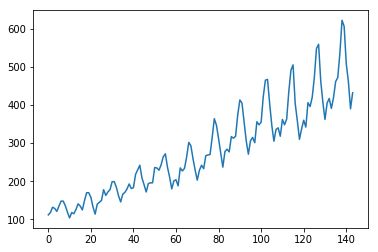

In [3]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('DataFiles/international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [4]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
dataset = dataset.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

(96, 48)


In [6]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [8]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 1s - loss: 0.0474
Epoch 2/100
 - 0s - loss: 0.0240
Epoch 3/100
 - 0s - loss: 0.0180
Epoch 4/100
 - 0s - loss: 0.0167
Epoch 5/100
 - 0s - loss: 0.0158
Epoch 6/100
 - 0s - loss: 0.0151
Epoch 7/100
 - 0s - loss: 0.0143
Epoch 8/100
 - 0s - loss: 0.0132
Epoch 9/100
 - 0s - loss: 0.0123
Epoch 10/100
 - 0s - loss: 0.0114
Epoch 11/100
 - 0s - loss: 0.0105
Epoch 12/100
 - 0s - loss: 0.0096
Epoch 13/100
 - 0s - loss: 0.0086
Epoch 14/100
 - 0s - loss: 0.0077
Epoch 15/100
 - 0s - loss: 0.0068
Epoch 16/100
 - 0s - loss: 0.0061
Epoch 17/100
 - 0s - loss: 0.0053
Epoch 18/100
 - 0s - loss: 0.0047
Epoch 19/100
 - 0s - loss: 0.0039
Epoch 20/100
 - 0s - loss: 0.0035
Epoch 21/100
 - 0s - loss: 0.0031
Epoch 22/100
 - 0s - loss: 0.0028
Epoch 23/100
 - 0s - loss: 0.0025
Epoch 24/100
 - 0s - loss: 0.0024
Epoch 25/100
 - 0s - loss: 0.0023
Epoch 26/100
 - 0s - loss: 0.0022
Epoch 27/100
 - 0s - loss: 0.0022
Epoch 28/100
 - 0s - loss: 0.0022
Epoch 29/100
 - 0s - loss: 0.0021
Epoch 30/100
 - 0s - lo

In [9]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.26 RMSE
Test Score: 47.68 RMSE


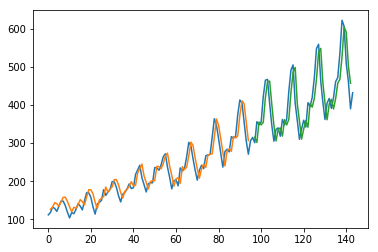

In [10]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Bibliografía

[1] Googfellow, I.; Bengio, Y.; Courville, A. "Deep Learning", The MIT Press, Cambridge, MA, USA, 2016. 